In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('Data/creditCard.csv')

In [38]:
#Extracting Independent and dependent Variable  
#x= df.iloc[:, 0:29].values  
#y= df.iloc[:, 30].values  
#split dataset in features and target variable
X = df.drop(['Class'], axis=1) # Features
y = df.Class # Target variable

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [6]:
sum(y_train)

391

In [7]:
sum(y_test)

101

In [8]:
#feature Scaling   
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

In [36]:
#Fitting Decision Tree classifier to the training set    
classifier= RandomForestClassifier(criterion="log_loss", max_depth=16, n_estimators=256) # n_estimators= 10, criterion="entropy"
classifier.fit(x_train, y_train) 

RandomForestClassifier(criterion='log_loss', max_depth=16, n_estimators=256)

In [39]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [40]:
#Creating the Confusion matrix    
cm= confusion_matrix(y_test, y_pred) 

<AxesSubplot:>

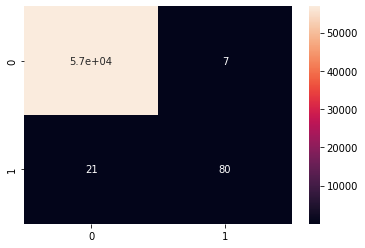

In [41]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

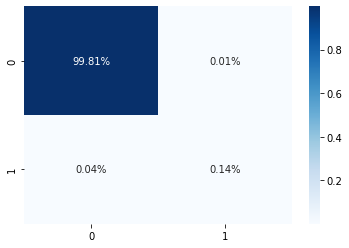

In [42]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

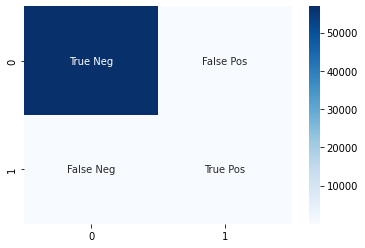

In [43]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 0.96
Macro Recall: 0.90
Macro F1-score: 0.93

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.79      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236778,148949.0,-1.227033,0.987207,0.654979,-2.559724,0.346834,-0.634095,0.738285,0.405477,0.070475,...,-0.097164,-0.070342,-0.293542,-0.371721,0.518298,0.858450,0.749546,0.011475,0.027130,20.30
127073,78200.0,1.250596,0.159552,0.147621,0.472220,-0.023937,-0.287444,0.021041,-0.041342,0.102588,...,-0.130836,-0.210083,-0.580817,0.049119,-0.429060,0.299309,0.234803,-0.022217,0.006667,6.15
208502,137149.0,1.125402,-2.288998,-3.123785,-0.103566,-0.311680,-1.151728,1.184200,-0.635862,-1.314001,...,0.484541,0.263259,0.020985,-0.636845,-0.259110,0.272149,0.961966,-0.240867,-0.007494,583.21
263323,160893.0,2.064857,0.285198,-2.487311,0.357674,0.965436,-0.971181,0.622246,-0.313264,-0.190080,...,-0.161876,0.090425,0.422986,-0.019409,0.691878,0.354898,0.662896,-0.103162,-0.061743,2.95


In [46]:
TP, FN, FP, TN = 0, 0, 0, 0

def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

def getTotalAmountFalseNegative(df):
    df = df[df.case == 'false negative'] 
    totalAmount = 0
    for index, row in df.iterrows():
        totalAmount += row.Amount
    return totalAmount

def total_cost(cm, X_test, y_test, y_pred):
    for cls in range(cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, cm).ravel()
        #print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
    
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])

    X_test['case'] = labels[y_test * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegative(X_test) + (FP + TP) * Ca
    print('Total cost: ' + str(TotalCost))

In [47]:
total_cost(cm, x_test, y_test, y_pred)

TP: 80, FN: 21, FP: 7, TN: 56854
Total cost: 5189.35


In [48]:
my_scorer(y_test, y_pred)

No of FN: 21
5189.35


5189.35

# Undersampling

In [75]:
# Split dataset into training set and test set
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # 80% training and 20% test

In [76]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_us, y_train_us = rus.fit_resample(X_train_us, y_train_us)

In [77]:
classifier_us = RandomForestClassifier(max_depth=16, n_estimators=64) # n_estimators= 10, criterion="entropy"

classifier_us.fit(X_train_us, y_train_us) 

#Predict the response for test dataset
y_pred_us = classifier_us.predict(X_test_us)

In [78]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_us = confusion_matrix(y_test_us, y_pred_us) 

<AxesSubplot:>

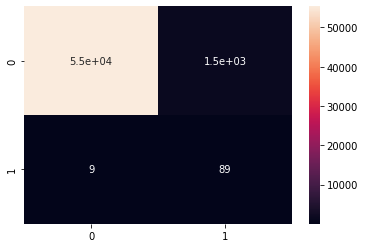

In [79]:
sns.heatmap(cm_us, annot=True)

<AxesSubplot:>

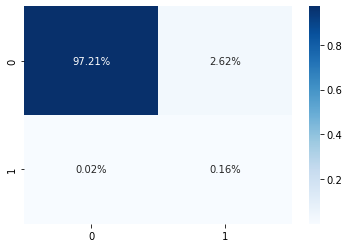

In [80]:
sns.heatmap(cm_us/np.sum(cm_us), annot=True, 
            fmt='.2%', cmap='Blues')

In [81]:
total_cost(cm_us, X_test_us, y_test_us, y_pred_us)

TP: 89, FN: 9, FP: 1492, TN: 55372
Total cost: 9198.71


# Oversampling

In [49]:
from imblearn.over_sampling import SMOTE

# Split dataset into training set and test set
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # 80% training and 20% test

smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X_train_smt, y_train_smt)

In [65]:
# randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 16, 'randomforestclassifier__n_estimators': 64
model_smt = RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=64)

# Train
model_smt = model_smt.fit(X_smt,y_smt)

#Predict the response for test dataset
y_pred_smt = model_smt.predict(X_test_smt)

<AxesSubplot:>

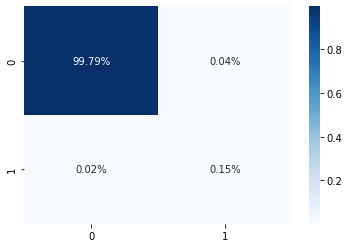

In [66]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_smt = confusion_matrix(y_test_smt, y_pred_smt) 

sns.heatmap(cm_smt/np.sum(cm_smt), annot=True, 
            fmt='.2%', cmap='Blues')

In [67]:
total_cost(cm_smt, X_test_smt, y_test_smt, y_pred_smt)

TP: 85, FN: 13, FP: 20, TN: 56844
Total cost: 2355.72


# Grid search

In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_x_elements_by_indices(x_train, indices):
    new_df = pd.DataFrame()
    for index in indices:
        try:
            new_df = new_df.append(x_train.iloc[index])
        except:
            print(str(index) + " not found")
    return new_df

def getTotalAmountFalseNegativeMyScorer(df, y_test, y_pred):
    fn_indices = []
    for ((index, row), i) in zip(y_test.items(), range(len(y_pred))):
        if y_pred[i]==0 and row!=y_pred[i]:
            fn_indices.append(index)
    print("No of FN: " + str(len(fn_indices)))
    df = df.iloc[fn_indices]
    totalAmount = 0
    for index, row in df.iterrows():
        totalAmount += row.Amount
    return totalAmount

def my_scorer(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

from sklearn.metrics import make_scorer
my_func = make_scorer(my_scorer, greater_is_better=False)

#my_scorer(y_test, y_pred)

In [22]:
from sklearn.model_selection import GridSearchCV

# Define parameters
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
criterion = ["gini", "entropy", "log_loss"]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# Build the gridsearch
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, scoring=my_func, cv = 5, verbose=10)

In [23]:
grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=2, n_estimators=64................................
No of FN: 38
5575.87
[CV 1/5; 1/9] END max_depth=2, n_estimators=64;, score=-5575.870 total time=  10.3s
[CV 2/5; 1/9] START max_depth=2, n_estimators=64................................
No of FN: 37
7333.96
[CV 2/5; 1/9] END max_depth=2, n_estimators=64;, score=-7333.960 total time=   9.3s
[CV 3/5; 1/9] START max_depth=2, n_estimators=64................................
No of FN: 28
2725.62
[CV 3/5; 1/9] END max_depth=2, n_estimators=64;, score=-2725.620 total time=  12.6s
[CV 4/5; 1/9] START max_depth=2, n_estimators=64................................
No of FN: 31
4115.529999999999
[CV 4/5; 1/9] END max_depth=2, n_estimators=64;, score=-4115.530 total time=  13.4s
[CV 5/5; 1/9] START max_depth=2, n_estimators=64................................
No of FN: 44
10753.360000000002
[CV 5/5; 1/9] END max_depth=2, n_estimators=64;, score=-10753.360 total t

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.653910,1.582548,0.134994,0.018354,2,64,"{'max_depth': 2, 'n_estimators': 64}",-5575.87,-7333.96,-2725.62,-4115.53,-10753.36,-6100.868,2784.804719,9
1,22.990987,3.173696,0.210413,0.035212,2,128,"{'max_depth': 2, 'n_estimators': 128}",-5580.11,-7438.88,-2747.66,-3519.57,-10631.22,-5983.488,2843.370084,7
2,35.592577,0.355149,0.335386,0.004317,2,256,"{'max_depth': 2, 'n_estimators': 256}",-5509.89,-7333.96,-2725.62,-4122.26,-10640.04,-6066.354,2748.639151,8
3,41.327981,6.812233,0.186799,0.043385,8,64,"{'max_depth': 8, 'n_estimators': 64}",-2981.54,-4895.31,-1876.34,-2156.34,-2722.07,-2926.320,1059.907178,5
4,91.724607,3.032806,0.355011,0.048067,8,128,"{'max_depth': 8, 'n_estimators': 128}",-2985.54,-4696.04,-1876.34,-2141.34,-2713.07,-2882.466,988.931462,4
5,151.612604,22.871897,0.544400,0.080602,8,256,"{'max_depth': 8, 'n_estimators': 256}",-2985.54,-4696.04,-2162.34,-2141.34,-2713.07,-2939.666,935.933749,6
6,54.045212,1.823483,0.198587,0.007088,16,64,"{'max_depth': 16, 'n_estimators': 64}",-2985.54,-4259.66,-1829.83,-2140.34,-2726.07,-2788.288,842.163089,1
7,104.744044,2.925218,0.365987,0.006359,16,128,"{'max_depth': 16, 'n_estimators': 128}",-2976.54,-4317.64,-2161.34,-2145.34,-2726.07,-2865.386,794.349149,2
8,214.290566,7.974222,0.716593,0.027948,16,256,"{'max_depth': 16, 'n_estimators': 256}",-2981.54,-4696.04,-1839.83,-2150.34,-2721.07,-2877.764,994.776633,3


In [34]:
criterion = ["gini", "entropy", "log_loss"]
param_grid_criterion = dict(max_depth=max_depth, n_estimators=n_estimators, criterion=criterion)

# Build the gridsearch
dfrst_c = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion)
grid_c = GridSearchCV(estimator=dfrst_c, param_grid=param_grid_criterion, scoring=my_func, cv = 5, verbose=10)

In [35]:
grid_results_c = grid_c.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results_c.cv_results_['mean_test_score'], grid_results_c.best_params_))
results_df_c = pd.DataFrame(grid_results_c.cv_results_)
results_df_c

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START criterion=gini, max_depth=2, n_estimators=64...............
No of FN: 37
5580.11
[CV 1/5; 1/27] END criterion=gini, max_depth=2, n_estimators=64;, score=-5580.110 total time=   9.6s
[CV 2/5; 1/27] START criterion=gini, max_depth=2, n_estimators=64...............
No of FN: 37
7446.88
[CV 2/5; 1/27] END criterion=gini, max_depth=2, n_estimators=64;, score=-7446.880 total time=   9.5s
[CV 3/5; 1/27] START criterion=gini, max_depth=2, n_estimators=64...............
No of FN: 29
2725.62
[CV 3/5; 1/27] END criterion=gini, max_depth=2, n_estimators=64;, score=-2725.620 total time=   9.7s
[CV 4/5; 1/27] START criterion=gini, max_depth=2, n_estimators=64...............
No of FN: 30
4119.53
[CV 4/5; 1/27] END criterion=gini, max_depth=2, n_estimators=64;, score=-4119.530 total time=   9.4s
[CV 5/5; 1/27] START criterion=gini, max_depth=2, n_estimators=64...............
No of FN: 43
10631.220000000003
[CV 5/5; 1/27

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.487781,0.143691,0.109605,0.002730,gini,2,64,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",-5580.11,-7446.88,-2725.62,-4119.53,-10631.22,-6100.672,2754.088800,26
1,18.698042,0.231618,0.192794,0.005435,gini,2,128,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",-3705.21,-7337.96,-2735.62,-4122.26,-10618.99,-5704.008,2902.939706,19
2,37.461152,0.063745,0.352388,0.005757,gini,2,256,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",-5580.11,-7442.88,-2725.62,-4122.26,-10636.22,-6101.418,2754.951543,27
3,33.723898,1.221203,0.141393,0.004316,gini,8,64,"{'criterion': 'gini', 'max_depth': 8, 'n_estim...",-2987.85,-4381.84,-2121.83,-2166.34,-2713.07,-2874.186,822.068606,8
4,73.064156,0.940328,0.266199,0.006654,gini,8,128,"{'criterion': 'gini', 'max_depth': 8, 'n_estim...",-2985.54,-4470.12,-2177.34,-2146.34,-2713.07,-2898.482,848.264827,9
5,151.075376,0.935600,0.508401,0.005975,gini,8,256,"{'criterion': 'gini', 'max_depth': 8, 'n_estim...",-2985.54,-4682.08,-2172.34,-2136.34,-2713.07,-2937.874,929.899190,10
6,68.345982,1.146259,0.223401,0.005950,gini,16,64,"{'criterion': 'gini', 'max_depth': 16, 'n_esti...",-4793.24,-4116.66,-1884.66,-2145.34,-2736.07,-3135.194,1132.725760,16
7,136.234928,2.168700,0.418189,0.021156,gini,16,128,"{'criterion': 'gini', 'max_depth': 16, 'n_esti...",-2992.85,-4407.14,-1880.34,-2145.34,-2726.07,-2830.348,882.644319,5
8,263.843342,10.870881,0.809827,0.038356,gini,16,256,"{'criterion': 'gini', 'max_depth': 16, 'n_esti...",-2985.54,-4425.09,-1834.83,-2145.34,-2731.07,-2824.374,898.582921,4
9,14.689186,0.280355,0.110435,0.002670,entropy,2,64,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",-5585.11,-7329.96,-3452.08,-3451.55,-10180.82,-5999.904,2545.846691,25


In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def my_scorer_smt(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X_smt
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

my_func_smt = make_scorer(my_scorer_smt, greater_is_better=False)

#my_scorer(y_test, y_pred)

In [53]:
from imblearn.pipeline import Pipeline, make_pipeline

imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              RandomForestClassifier())

In [62]:
new_params = {'randomforestclassifier__' + key: param_grid_criterion[key] for key in param_grid_criterion}
# grid_c = GridSearchCV(estimator=dfrst_c, param_grid=param_grid_criterion, scoring=my_func, cv = 5, verbose=10)return_train_score=True,
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring=my_func_smt,  verbose=10)
grid_search_imba = grid_imba.fit(x_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64
No of FN: 14
3858.589066343395
[CV 1/5; 1/27] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64;, score=-3858.589 total time=  26.5s
[CV 2/5; 1/27] START randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64
No of FN: 16
1503.7223543549499
[CV 2/5; 1/27] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64;, score=-1503.722 total time=  26.1s
[CV 3/5; 1/27] START randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64
No of FN: 9
2039.99
[CV 3/5; 1/27] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2,

In [63]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_search_imba.cv_results_['mean_test_score'], grid_search_imba.best_params_))
results_df_smt = pd.DataFrame(grid_search_imba.cv_results_)
results_df_smt

Best: [-2994.48937789 -2727.47537789 -2678.62537789 -2024.57594447
 -2038.33394447 -2046.23394447 -2096.88412789 -2159.04471869
 -2156.46871869 -2535.43937789 -2494.43937789 -2646.42537789
 -1939.43394447 -1974.23394447 -1967.23394447 -1937.95271869
 -2104.09471869 -2106.95471869 -2849.42537789 -2537.42537789
 -2541.43937789 -2028.53394447 -1968.23394447 -1965.23394447
 -1943.75471869 -2111.95271869 -1939.95271869], using {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 16, 'randomforestclassifier__n_estimators': 64}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__criterion,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,26.425212,0.501166,0.126394,0.020702,gini,2,64,"{'randomforestclassifier__criterion': 'gini', ...",-3858.589066,-1503.722354,-2039.99,-2912.363126,-4657.782343,-2994.489378,1153.552067,27
1,57.333325,4.654977,0.242401,0.035914,gini,2,128,"{'randomforestclassifier__criterion': 'gini', ...",-3668.589066,-1683.722354,-1939.92,-2062.363126,-4282.782343,-2727.475378,1044.673431,25
2,110.511302,6.581205,0.456195,0.015358,gini,2,256,"{'randomforestclassifier__criterion': 'gini', ...",-3669.589066,-1253.722354,-1739.67,-2382.363126,-4347.782343,-2678.625378,1163.430372,24
3,91.871207,7.328404,0.243392,0.025567,gini,8,64,"{'randomforestclassifier__criterion': 'gini', ...",-2506.666112,-937.570484,-1409.38,-1546.863126,-3722.400000,-2024.575944,990.280153,9
4,160.549065,0.561124,0.319188,0.012275,gini,8,128,"{'randomforestclassifier__criterion': 'gini', ...",-2576.666112,-986.570484,-1388.67,-1497.363126,-3742.400000,-2038.333944,1001.455110,11
5,260.359364,14.379277,0.623394,0.054025,gini,8,256,"{'randomforestclassifier__criterion': 'gini', ...",-2586.666112,-1011.570484,-1383.67,-1491.863126,-3757.400000,-2046.233944,1003.693445,12
6,111.255595,1.689219,0.246801,0.003710,gini,16,64,"{'randomforestclassifier__criterion': 'gini', ...",-2238.276112,-837.722354,-879.67,-2674.039830,-3854.712343,-2096.884128,1141.066084,13
7,234.987857,8.905503,0.505599,0.018756,gini,16,128,"{'randomforestclassifier__criterion': 'gini', ...",-2549.079066,-832.722354,-879.67,-2679.039830,-3854.712343,-2159.044719,1157.042876,18
8,486.208240,6.885124,0.944283,0.022858,gini,16,256,"{'randomforestclassifier__criterion': 'gini', ...",-2546.199066,-832.722354,-869.67,-2669.039830,-3864.712343,-2156.468719,1161.109000,17
9,29.636394,1.497694,0.108814,0.005548,entropy,2,64,{'randomforestclassifier__criterion': 'entropy...,-3328.589066,-1128.722354,-1534.74,-2427.363126,-4257.782343,-2535.439378,1147.822654,20


# Dropping outliers

In [69]:
from sklearn.ensemble import IsolationForest
transactions = df
anomaly_inputs = []
for name in transactions.columns[1:29]:
    anomaly_inputs.append(name)
anomaly_inputs.append('Class')

model_IF = IsolationForest(contamination=float(0.1),random_state=42)

anomaly_df = transactions
model_IF.fit(anomaly_df[anomaly_inputs])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [70]:
anomaly_df['anomaly_scores'] = model_IF.decision_function(anomaly_df[anomaly_inputs])
anomaly_df['anomaly'] = model_IF.predict(anomaly_df[anomaly_inputs])

In [82]:
df_wo_o = anomaly_df[(anomaly_df["anomaly"]==1) | ((anomaly_df["Class"]==1) & (anomaly_df["anomaly"]==-1))]
df_wo_o = df_wo_o.drop("anomaly", axis='columns')
df_wo_o = df_wo_o.drop("anomaly_scores", axis='columns')

In [83]:
from imblearn.over_sampling import SMOTE

#split dataset in features and target variable
X_wo_outliers = df_wo_o.drop(['Class'], axis=1) # Features
y_wo_outliers = df_wo_o.Class # Target variable

# Split dataset into training set and test set
X_train_smt_wo_outliers, X_test_smt_wo_outliers, y_train_smt_wo_outliers, y_test_smt_wo_outliers = train_test_split(X_wo_outliers, y_wo_outliers, test_size=0.2, stratify=y_wo_outliers, random_state=42) # 80% training and 20% test

smote_technique = SMOTE(sampling_strategy='minority')
X_smt_wo_outliers, y_smt_wo_outliers = smote_technique.fit_resample(X_train_smt_wo_outliers, y_train_smt_wo_outliers)

In [84]:
model_smt_wo_outliers = RandomForestClassifier(criterion='entropy', max_depth=16, n_estimators=64)

# Train
model_smt_wo_outliers = model_smt_wo_outliers.fit(X_smt_wo_outliers,y_smt_wo_outliers)

#Predict the response for test dataset
y_pred_smt_wo_outliers = model_smt_wo_outliers.predict(X_test_smt_wo_outliers)

<AxesSubplot:>

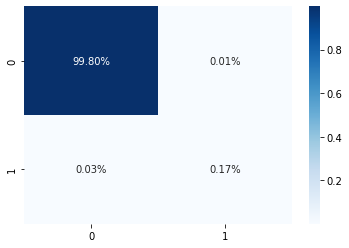

In [85]:
cm_smt_wo_outliers = confusion_matrix(y_test_smt_wo_outliers, y_pred_smt_wo_outliers) 

sns.heatmap(cm_smt_wo_outliers/np.sum(cm_smt_wo_outliers), annot=True, 
            fmt='.2%', cmap='Blues')

In [86]:
total_cost(cm_smt_wo_outliers, X_test_smt_wo_outliers, y_test_smt_wo_outliers, y_pred_smt_wo_outliers)

TP: 85, FN: 13, FP: 4, TN: 51253
Total cost: 3785.3199999999997


In [87]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def my_scorer_smt_wo_outliers(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X_smt_wo_outliers
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

my_func_smt_wo_outliers = make_scorer(my_scorer_smt_wo_outliers, greater_is_better=False)

In [89]:
grid_imba_wo_outliers = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring=my_func_smt_wo_outliers,  verbose=10)
grid_search_imba_wo_outliers = grid_imba_wo_outliers.fit(x_train, y_train);

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64
No of FN: 13
2525.619730497104
[CV 1/5; 1/27] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64;, score=-2525.620 total time=  28.8s
[CV 2/5; 1/27] START randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64
No of FN: 16
3367.3833238020025
[CV 2/5; 1/27] END randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64;, score=-3367.383 total time=  28.0s
[CV 3/5; 1/27] START randomforestclassifier__criterion=gini, randomforestclassifier__max_depth=2, randomforestclassifier__n_estimators=64
No of FN: 12
2088.3871792762375
[CV 3/5; 1/27] END randomforestclassifier__criterion=gini, randomforestclassifier__

In [93]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_search_imba_wo_outliers.cv_results_['mean_test_score'], grid_search_imba_wo_outliers.best_params_))
results_df_imba_wo_outliers = pd.DataFrame(grid_search_imba_wo_outliers.cv_results_)
results_df_imba_wo_outliers

Best: [-2464.50793882 -2363.44257073 -2242.06457073 -1567.29558919
 -1542.97758919 -1541.97758919 -1479.04837972 -1483.72174781
 -1487.65637972 -2443.54304091 -2137.73393882 -2255.92104091
 -1484.47358919 -1456.47558919 -1464.47558919 -1429.51637972
 -1394.56167208 -1398.16567208 -2077.06457073 -2094.06457073
 -2197.66857073 -1512.47558919 -1453.97758919 -1469.47558919
 -1451.64167208 -1398.56167208 -1394.56167208], using {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 16, 'randomforestclassifier__n_estimators': 128}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__criterion,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,27.710400,1.208426,0.141200,0.015855,gini,2,64,"{'randomforestclassifier__criterion': 'gini', ...",-2525.61973,-3367.383324,-2088.387179,-2269.982958,-2071.166502,-2464.507939,480.196396,27
1,54.290995,4.273794,0.222207,0.036857,gini,2,128,"{'randomforestclassifier__criterion': 'gini', ...",-2370.29289,-2242.383324,-2163.387179,-2474.982958,-2566.166502,-2363.442571,147.148006,25
2,103.896795,3.167439,0.475005,0.040064,gini,2,256,"{'randomforestclassifier__criterion': 'gini', ...",-2580.29289,-2437.383324,-2423.387179,-1958.092958,-1811.166502,-2242.064571,300.579015,23
3,87.641601,4.472061,0.251199,0.016691,gini,8,64,"{'randomforestclassifier__criterion': 'gini', ...",-1710.61973,-1139.685727,-1842.759530,-1719.982958,-1423.430000,-1567.295589,254.276671,18
4,169.173206,5.230031,0.478394,0.060139,gini,8,128,"{'randomforestclassifier__criterion': 'gini', ...",-1710.61973,-1079.685727,-1837.759530,-1654.982958,-1431.840000,-1542.977589,266.284208,17
5,238.422551,21.647824,0.568600,0.012249,gini,8,256,"{'randomforestclassifier__criterion': 'gini', ...",-1675.61973,-1139.685727,-1812.759530,-1664.982958,-1416.840000,-1541.977589,238.248425,16
6,91.727194,0.970343,0.218013,0.004142,gini,16,64,"{'randomforestclassifier__criterion': 'gini', ...",-1391.29289,-1816.493324,-1338.387179,-1539.548465,-1309.520041,-1479.048380,186.416634,11
7,182.805357,1.112245,0.410395,0.007327,gini,16,128,"{'randomforestclassifier__criterion': 'gini', ...",-1431.60973,-1821.493324,-1328.387179,-1527.598465,-1309.520041,-1483.721748,186.121213,12
8,363.885229,2.669985,0.812601,0.028301,gini,16,256,"{'randomforestclassifier__criterion': 'gini', ...",-1431.28289,-1821.493324,-1343.387179,-1527.598465,-1314.520041,-1487.656380,182.762272,14
9,23.066395,0.155170,0.097605,0.003305,entropy,2,64,{'randomforestclassifier__criterion': 'entropy...,-2305.29289,-2687.383324,-2940.779530,-2168.092958,-2116.166502,-2443.543041,319.018326,26
